In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Metricas
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    precision_score,
    recall_score,
    )
import keras

In [ ]:
df = pd.read_csv('30min_normalizado.csv')
X = df.drop(['Unnamed: 0', 'rr_mean_boxcox','rmssd_boxcox','pnn50_sqrt','sd1_boxcox','lmean_boxcox','entropia_boxcox','captura_boxcox','determinismo_boxcox','etiqueta'], axis=1)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
y = df['etiqueta']

In [ ]:
X.columns

Index(['sdrr_boxcox', 'sdsd_boxcox', 'dam_boxcox', 'vlf_boxcox', 'lf_boxcox',
       'hf_boxcox', 'lfhf_boxcox', 'sd2_boxcox', 'sd12_boxcox', 'rec_boxcox',
       'lmax_boxcox', 'nn50_sqrt'],
      dtype='object')

In [ ]:
y_encoded = tf.keras.utils.to_categorical(y)

In [ ]:
df['etiqueta'].value_counts()

,count
etiqueta,
0,32
1,25
2,25


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_encoded, test_size = 0.2)

MODELO

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits= 5, shuffle= True, random_state = 42)
train_acc_per_fold = []
acc_per_fold = []
train_loss_per_fold = []
loss_per_fold = []
fold_no = 1

for train, test in kfold.split(X_train, y_train):
  model = Sequential()
  model.add(Dense(10, input_shape = (12,), activation = 'relu',name= 'oculta_1'))
  model.add(Dense(3, activation = 'softmax',name= 'salida'))
  model.compile(
      Adam(learning_rate = 0.005),
      'categorical_crossentropy',
      metrics = ['accuracy']
                )


  print('---------------------------------------------------')
  print(f'entrenamiento para pliegue numero: {fold_no}')

  history = model.fit(X_train[train], y_train[train],
                      batch_size = 32,
                      epochs = 100,
                      verbose = 2
                      )
  #metricas

  scores = model.evaluate(X_train[train], y_train[train], verbose = 0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  train_acc_per_fold.append(scores[1] * 100)
  train_loss_per_fold.append(scores[0])

  scores = model.evaluate(X_train[test], y_train[test], verbose = 0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

---------------------------------------------------
entrenamiento para pliegue numero: 1
Epoch 1/100
2/2 - 1s - loss: 1.4922 - accuracy: 0.2500 - 963ms/epoch - 481ms/step
Epoch 2/100
2/2 - 0s - loss: 1.4089 - accuracy: 0.2500 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 1.3246 - accuracy: 0.2692 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 1.2512 - accuracy: 0.2885 - 16ms/epoch - 8ms/step
Epoch 5/100
2/2 - 0s - loss: 1.1977 - accuracy: 0.3077 - 13ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 1.1323 - accuracy: 0.2885 - 19ms/epoch - 9ms/step
Epoch 7/100
2/2 - 0s - loss: 1.0862 - accuracy: 0.3462 - 17ms/epoch - 9ms/step
Epoch 8/100
2/2 - 0s - loss: 1.0370 - accuracy: 0.4808 - 23ms/epoch - 11ms/step
Epoch 9/100
2/2 - 0s - loss: 0.9955 - accuracy: 0.6346 - 13ms/epoch - 7ms/step
Epoch 10/100
2/2 - 0s - loss: 0.9531 - accuracy: 0.6923 - 14ms/epoch - 7ms/step
Epoch 11/100
2/2 - 0s - loss: 0.9179 - accuracy: 0.7115 - 12ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 0.8812

In [ ]:
# == Provide average scores ==
print('TRAIN SCORES')
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(train_acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {train_loss_per_fold[i]} - Accuracy: {train_acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(train_acc_per_fold)}')
print(f'> Loss: {np.mean(train_loss_per_fold)}')
print('------------------------------------------------------------------------')

# == Provide average scores ==
print('TEST SCORES')
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)}')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

TRAIN SCORES
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.15046793222427368 - Accuracy: 96.15384340286255%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.15724387764930725 - Accuracy: 96.15384340286255%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.16623981297016144 - Accuracy: 92.30769276618958%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.0938774049282074 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.09547723084688187 - Accuracy: 100.0%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 96.92307591438293
> Loss: 0.13266125172376633
----------------------------------------------------------

In [ ]:
def crear_modelo():
  model = Sequential()
  model.add(Dense(10, input_shape = (12,), activation = 'relu',name= 'oculta_1'))
  model.add(Dense(3, activation = 'softmax',name= 'salida'))
  model.compile(
      Adam(learning_rate = 0.005),
      'categorical_crossentropy',
      metrics = ['accuracy']
                )
  return model

In [ ]:
model = crear_modelo()
model.summary()
MLP = model.fit(X_train, y_train, validation_split=0.20 ,epochs = 100, verbose=2)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta_1 (Dense)            (None, 10)                130       
                                                                 
 salida (Dense)              (None, 3)                 33        
                                                                 
Total params: 163 (652.00 Byte)
Trainable params: 163 (652.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 - 1s - loss: 1.2830 - accuracy: 0.3654 - val_loss: 1.3129 - val_accuracy: 0.4615 - 1s/epoch - 666ms/step
Epoch 2/100
2/2 - 0s - loss: 1.1905 - accuracy: 0.4423 - val_loss: 1.2331 - val_accuracy: 0.4615 - 38ms/epoch - 19ms/step
Epoch 3/100
2/2 - 0s - loss: 1.1018 - accuracy: 0.5962 - val_loss: 1.1665 - val_accuracy: 0.3846 - 38ms/epoch - 19ms/step
Epoch 4/100
2/2 - 0s - loss: 1.0346 - accuracy

In [ ]:
train_loss,train_score = model.evaluate(X_train, y_train)
test_loss, test_score = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.3624 - accuracy: 0.8235


In [ ]:
print("train loss: {:.2f}, accuracy score: {:.2f}%".format(train_loss,train_score*100))
print("test loss: {:.2f}, accuracy score: {:.2f}%".format(test_loss,test_score*100))

train loss: 0.15, accuracy score: 96.92%
test loss: 0.36, accuracy score: 82.35%


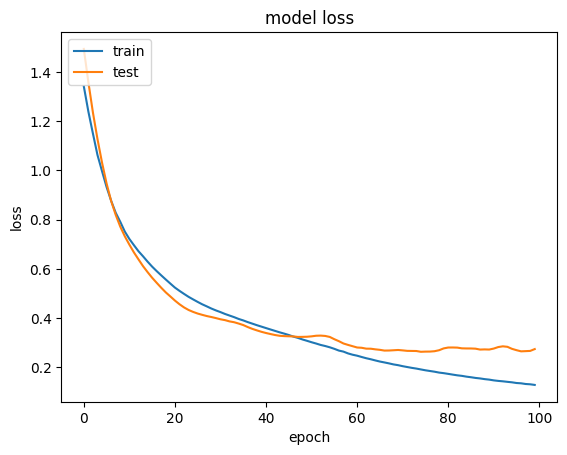

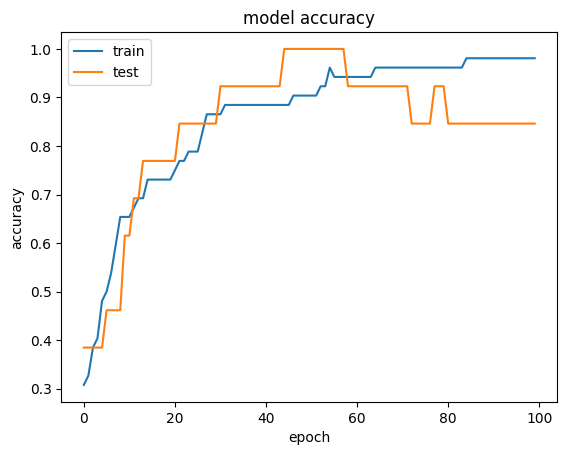

In [ ]:
# summarize history for loss
plt.plot(MLP.history['loss'])
plt.plot(MLP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(MLP.history['accuracy'])
plt.plot(MLP.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 20ms/step
exactitud :82.35 %
precision :89.92 %
puntaje f1 :83.59 %


<Axes: >

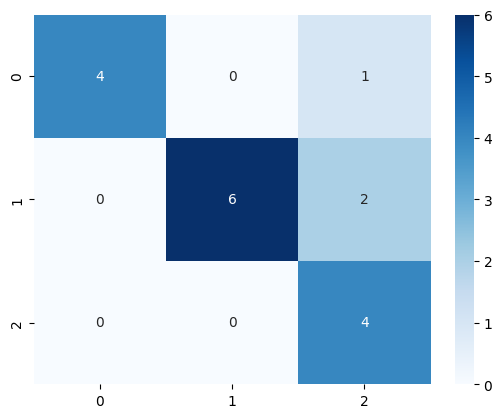

In [ ]:
y_pred_class = np.argmax(model.predict(X_test), axis=-1)
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_class, y_pred_class)
exactitud = accuracy_score(y_test_class,y_pred_class)
precision = precision_score(y_test_class,y_pred_class,average = 'weighted')
f1 = f1_score(y_test_class,y_pred_class,average = 'weighted')
print('exactitud :{:.2f} %'.format(exactitud*100))
print('precision :{:.2f} %'.format(precision*100))
print('puntaje f1 :{:.2f} %'.format(f1*100))
sns.heatmap(cm, annot = True, cmap='Blues', fmt='d')

In [ ]:
model.save('MLP_model_CV')

exactitud 82.35%
precision 82.35%
f1

In [ ]:
train_loss,train_score = percep.evaluate(X_train, y_train)
test_loss, test_score = percep.evaluate(X_test, y_test)

In [ ]:
dir(percep.metrics)

[]
